In [1]:
from solver.reconstruction.eno import EnoStencil, EnoPolynomial, ENO
from solver.reconstruction.polynomial_matrices import PolynomialMatrices
import numpy as np
import matplotlib.pyplot as plt
from solver.reconstruction.smoothness_indicators import SmoothnessIndicator
import math

In [2]:
# f = lambda x: math.exp(-2*x**2)
# f = lambda x: np.sin(np.pi * x)
# f = lambda x: 1 + 0.25 * np.sin(2 * np.pi * x) if -2 < x < 2 else 0.25 *np.sin(2 * np.pi * x)
# f = lambda x: 1 if -2 < x < 2 else 0
# f = lambda x: 1 if x < 0 else 0
# f = lambda x: (x - 1) * (x - 2) * (x + 1) * (x + 2)
f = lambda x: 0.25 + np.sin(np.pi * x) ** 4

In [3]:
xArray = np.linspace(-1, 1, 50)
qArray = np.array([f(x) for x in xArray])

In [4]:
xTrue = np.linspace(-1, 1, 500)
qTrue = np.array([f(x) for x in xTrue])

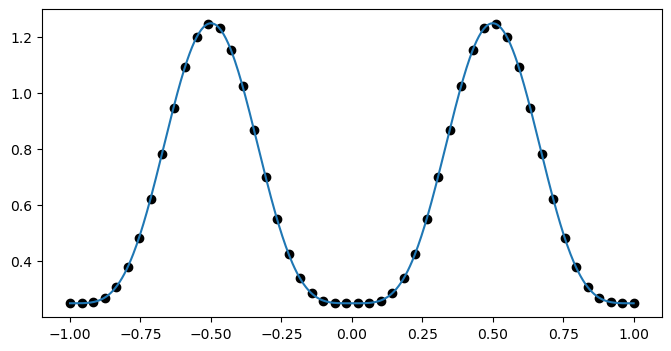

In [5]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.plot(xTrue, qTrue)
ax.scatter(xArray, qArray, color='black')

In [6]:
degree = 1

In [7]:
idx = 12

In [8]:
dx = xArray[1] - xArray[0]

In [9]:
polyMat = PolynomialMatrices(degree, dx)

In [10]:
extendedStencil = np.arange(idx - degree, idx + degree + 1)

In [11]:
extendedStencil

array([11, 12, 13])

In [12]:
xArray[extendedStencil]

array([-0.55102041, -0.51020408, -0.46938776])

In [13]:
qArray[extendedStencil]

array([1.19970458, 1.24794645, 1.23164417])

In [14]:
eno = ENO(xArray[extendedStencil], qArray[extendedStencil], degree, polyMat)

[1]


In [15]:
[i + idx for i in eno.shiftedStencil]

[12, 13]

In [16]:
qEno = np.array([eno.getValue(x) for x in xTrue])

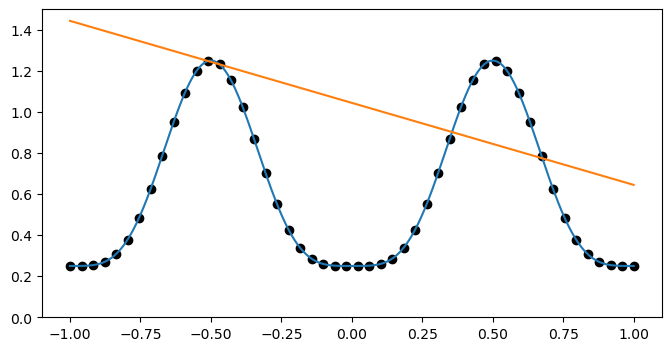

In [17]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.set_ylim(0, 1.5)
ax.plot(xTrue, qTrue)
ax.plot(xTrue, qEno)
ax.scatter(xArray, qArray, color='black')